# Linear and Logistic Regression

linear regression is a statistical technique used in machine learning when the input vector X collerates linearly with the output label y. There are fundementaly two ways to go about implementing linear regression:


## The Analytical Approach:
In the analytical approach, we can use the least squares method. The method is as follows: 
$$Ax = b$$
\
suppose that there exist no $x$ that satisfies the equation above. This simply meanse that $b$ is not in the linear combination of the columns of $A$, or in short, $b \not\in Col(A)$. The closest vector, $x$ denoted as $\hat{x}$, that is in $Col(A)$, is by definition the projection of the vector $b$ onto $COl(A)$, denoted as $proj_{Col(A)}(b)$. Thus, we have:

$$A\hat{x} = proj_{Col(A)}(b)$$
\
Now, we would like the difference between $b$ and $A\hat{x}$ to be minimal. Hence, we subtract b from both sides:
\
$$A\hat{x} - b = proj_{Col(A)}(b) - b$$
\
Notice that $proj_{Col(A)}(b) - b$ is orthogonal to $Col(A)$. This means that $proj_{Col(A)}(b) - b \in Nul(A^T)$.
\
$$A\hat{x} - b \in Nul(A^T)$$ 

By definition, we can say that:
$$A^T(A\hat{x} - b) = 0$$
Now by isolating $\hat{x}$ we get that:
$$\hat{x} = (A^TA)^{-1}(A^Tb)$$
## Using Stochastic Gradient Descent:
to fit a slope that minimizes the residual differences between the slop and the $i$th row, we have:
$$\hat{y} = W^TX + \beta$$
Then, we use SGD to minimize the squared difference between $y$ and $\hat{y}$ to get the following loss function:
$$f(y, \hat{y}) = \frac{1}{N}\sum_{i=0}^{N}{(y - \hat{y})}^2$$\
$$=\frac{(y - (W^TX + \beta))^2}{N}$$\
To minimize this, we take the derivative with respect to the parameters we are searching for: $W$ and $\beta$:

$$ \begin{bmatrix}
\frac{df}{dW}\\
\frac{df}{d\beta}
\end{bmatrix} = \begin{bmatrix}
\frac{-2X(y - (W^TX + \beta))}{N}\\
\
\frac{-2(y - (W^TX + \beta))}{N}
\end{bmatrix}$$
Apply some simplification to get:
$$ \begin{bmatrix}
\frac{df}{dW}\\
\frac{df}{d\beta}
\end{bmatrix} = \begin{bmatrix}
\frac{2X(\hat{y} - y)}{N}\\
\
\frac{2(\hat{y} - y))}{N}
\
\end{bmatrix}$$
As such, this gives the simple update rule:
$$ \hat{W} = W - \alpha \frac{df}{dW}$$
\
$$ \hat{\beta} = \beta - \alpha \frac{df}{d\beta}$$

Below is an implemenation of both methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=10, random_state=111)
print(X.shape, y.shape)

(200, 1) (200,)


In [ ]:
#Analytical Solution
n_samples, n_features = X.shape
A = np.zeros((n_samples, n_features+1), dtype=np.float64)
A[:, -1] = [1 for i in range(A.shape[0])] # add ones for bias
A[:, :n_features] = X #add in the X vectors
w = la.inv(A.T @ A)@(A.T @ y) #W[0] ==> slope, and w[1] ==> beta 
print(w)

[24.13749548 -1.22527052]


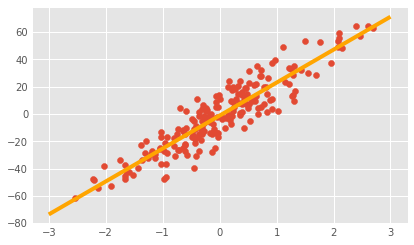

In [ ]:
x_hat = np.linspace(np.floor(X.min()), np.ceil(X.max()), 1000)
plt.scatter(X, y)
plt.plot(x_hat, w[0]*x_hat + w[1], color='orange')

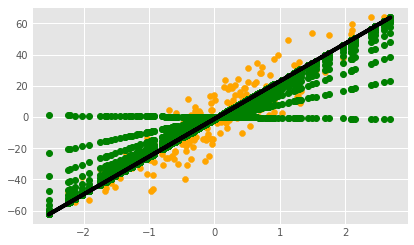

In [ ]:
#By using gradient descent:
epochs = 1000
lr = 0.01
n_samples, n_features = X.shape
w = np.random.randn(n_features)
b = 0
plt.scatter(X, y, color='orange')
for i in range(epochs):
    y_hat = np.dot(X, w) + b
    if (i % 50) == 0:
        plt.plot(X, y_hat, 'go')
    
    der_w = np.mean(X.T*(y_hat - y))
    der_b = np.mean(2*(y_hat - y))
    w -= lr * der_w
    b -= lr * der_b


plt.plot(X, np.dot(X, w) + b, color='k')
    
